In [8]:
import sys
sys.path.append('../dataset/')
sys.path.append('../network/')
sys.path.append('../model/')

import os
import glob
import time
import torch
import logging
import argparse
import numpy as np
import pandas as pd
import torch.optim as optim
import torch.nn as nn
import torch
import seaborn as sns

from pathlib import Path
from main_loading import *
from main_network import *
from main_model_rec import *
from main_model_one_class import *
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

> Modified things in local:
- Changed the `network/main_network.py`, add a new term rep_dim and changed them all to 2.

# 0. Variable Definitions

In [9]:
# For data
root = '/net/leksai/data/FashionMNIST'
loader_name = 'fmnist'
loader_eval_name = 'fmnist_eval'
label_normal = (0,)
label_abnormal = tuple()
ratio_abnormal = 0

# For model
pretrain = True
net_name = 'fmnist_LeNet_one_class'
optimizer_ = 'one_class_unsupervised'
eta = 0.1
optimizer_name = 'adam'
lr = 0.0001
ae_lr = 0.001
n_epochs = 150
ae_n_epochs = 150
lr_milestones = (50, 100, 150)
batch_size = 128
weight_decay = 0.5e-6
ae_weight_decay = 0.5e-3
device_no = 1
device = 'cuda:1'
n_jobs_dataloader = 0
save_ae = True
load_ae = False

log_path = 'misc/one_class_unsupervised_fmnist_0.log'
model_path = 'misc/one_class_unsupervised_fmnist_0.tar'

In [3]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()
logger.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler = logging.FileHandler(log_path)
file_handler.setLevel(logging.INFO)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

# 1. Load Dataset

In [4]:
dataset = load_dataset(loader_name=loader_name,
                       root=root,
                       label_normal=label_normal,
                       label_abnormal=label_abnormal,
                       ratio_abnormal=ratio_abnormal)

Loading dataset for you!
Almost loaded!


# 2. Load Model

In [5]:
model = OneClassModel(optimizer_, eta)
model.set_network(net_name)
logger.info('I am pre-training for you.')
model.pretrain(dataset, optimizer_name, ae_lr, ae_n_epochs, lr_milestones,
               batch_size, ae_weight_decay, device, n_jobs_dataloader)
model.train(dataset, eta, optimizer_name, lr, n_epochs, lr_milestones,
            batch_size, weight_decay, device, n_jobs_dataloader, label_normal)

INFO:root:I am pre-training for you.
/home/ziyuye/env/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
INFO:root:| Epoch: 001/150 | Train Time: 1.014s | Train Loss: 0.049511 |
INFO:root:| Epoch: 002/150 | Train Time: 1.025s | Train Loss: 0.027860 |
INFO:root:| Epoch: 003/150 | Train Time: 1.038s | Train Loss: 0.026632 |
INFO:root:| Epoch: 004/150 | Train Time: 1.130s | Train Loss: 0.026018 |
INFO:root:| Epoch: 005/150 | Train Time: 1.060s | Train Loss: 0.025527 |
INFO:root:| Epoch: 006/150 | Train Time: 

INFO:root:| Epoch: 104/150 | Train Time: 1.060s | Train Loss: 0.021600 |
INFO:root:| Epoch: 105/150 | Train Time: 1.036s | Train Loss: 0.021629 |
INFO:root:| Epoch: 106/150 | Train Time: 1.065s | Train Loss: 0.021609 |
INFO:root:| Epoch: 107/150 | Train Time: 1.060s | Train Loss: 0.021605 |
INFO:root:| Epoch: 108/150 | Train Time: 1.108s | Train Loss: 0.021604 |
INFO:root:| Epoch: 109/150 | Train Time: 1.132s | Train Loss: 0.021491 |
INFO:root:| Epoch: 110/150 | Train Time: 1.055s | Train Loss: 0.021583 |
INFO:root:| Epoch: 111/150 | Train Time: 1.013s | Train Loss: 0.021603 |
INFO:root:| Epoch: 112/150 | Train Time: 1.100s | Train Loss: 0.021569 |
INFO:root:| Epoch: 113/150 | Train Time: 1.088s | Train Loss: 0.021642 |
INFO:root:| Epoch: 114/150 | Train Time: 1.087s | Train Loss: 0.021571 |
INFO:root:| Epoch: 115/150 | Train Time: 1.089s | Train Loss: 0.021570 |
INFO:root:| Epoch: 116/150 | Train Time: 1.068s | Train Loss: 0.021576 |
INFO:root:| Epoch: 117/150 | Train Time: 1.056s | T

Learning rate: 0.0001


INFO:root:Center c initialized.
INFO:root:Starting training...
INFO:root:| Epoch: 001/150 | Train Time: 0.870s | Train Loss: 0.059218 |
INFO:root:| Epoch: 002/150 | Train Time: 0.881s | Train Loss: 0.014082 |
INFO:root:| Epoch: 003/150 | Train Time: 0.947s | Train Loss: 0.007472 |
INFO:root:| Epoch: 004/150 | Train Time: 0.890s | Train Loss: 0.005113 |
INFO:root:| Epoch: 005/150 | Train Time: 0.975s | Train Loss: 0.003846 |
INFO:root:| Epoch: 006/150 | Train Time: 0.926s | Train Loss: 0.003039 |
INFO:root:| Epoch: 007/150 | Train Time: 0.901s | Train Loss: 0.002370 |
INFO:root:| Epoch: 008/150 | Train Time: 0.893s | Train Loss: 0.001981 |
INFO:root:| Epoch: 009/150 | Train Time: 0.886s | Train Loss: 0.001676 |
INFO:root:| Epoch: 010/150 | Train Time: 0.912s | Train Loss: 0.001420 |
INFO:root:| Epoch: 011/150 | Train Time: 0.874s | Train Loss: 0.001251 |
INFO:root:| Epoch: 012/150 | Train Time: 0.949s | Train Loss: 0.001152 |
INFO:root:| Epoch: 013/150 | Train Time: 0.814s | Train Loss:

INFO:root:| Epoch: 111/150 | Train Time: 0.956s | Train Loss: 0.000117 |
INFO:root:| Epoch: 112/150 | Train Time: 0.919s | Train Loss: 0.000099 |
INFO:root:| Epoch: 113/150 | Train Time: 0.852s | Train Loss: 0.000107 |
INFO:root:| Epoch: 114/150 | Train Time: 0.876s | Train Loss: 0.000116 |
INFO:root:| Epoch: 115/150 | Train Time: 0.979s | Train Loss: 0.000108 |
INFO:root:| Epoch: 116/150 | Train Time: 0.888s | Train Loss: 0.000109 |
INFO:root:| Epoch: 117/150 | Train Time: 0.913s | Train Loss: 0.000109 |
INFO:root:| Epoch: 118/150 | Train Time: 0.909s | Train Loss: 0.000109 |
INFO:root:| Epoch: 119/150 | Train Time: 0.918s | Train Loss: 0.000105 |
INFO:root:| Epoch: 120/150 | Train Time: 0.907s | Train Loss: 0.000123 |
INFO:root:| Epoch: 121/150 | Train Time: 0.913s | Train Loss: 0.000121 |
INFO:root:| Epoch: 122/150 | Train Time: 0.948s | Train Loss: 0.000110 |
INFO:root:| Epoch: 123/150 | Train Time: 0.868s | Train Loss: 0.000108 |
INFO:root:| Epoch: 124/150 | Train Time: 0.988s | T

In [6]:
model.test(dataset, device, n_jobs_dataloader, label_normal)

INFO:root:Starting testing...
INFO:root:Test Loss: 0.000239
INFO:root:Test Time: 0.136s
INFO:root:Finished testing.


In [7]:
model.save_model(export_model=model_path, save_ae=save_ae)

In [8]:
indices_, labels_, scores_ = zip(*model.results['test_scores'])
indices_, labels_, scores_ = np.array(indices_), np.array(labels_), np.array(scores_)
result_df = pd.DataFrame()
result_df['indices'] = indices_; result_df['labels'] = labels_; result_df['scores'] = scores_

result_df.drop('indices', inplace=True, axis=1)
df_normal = result_df[result_df.labels.isin(label_normal)]
df_abnormal = result_df[result_df.labels.isin(label_abnormal)]

cut_90 = df_normal.scores.quantile(0.90)
# np.save(cut_90_path, cut_90)

cut_95 = df_normal.scores.quantile(0.95)
# np.save(cut_95_path, cut_95)

cut_99 = df_normal.scores.quantile(0.99)
# np.save(cut_99_path, cut_99)

In [9]:
label_eval_list = [(i,) for i in range(10)]
total_roc_auc = []
total_recall_90 = []
total_recall_95 = []
total_recall_99 = []

for label_eval in label_eval_list:
    # Formating the path
    test_eval = False
    if (label_eval[0] in label_normal) or (label_eval[0] in label_abnormal):
        test_eval = True
        
    # Start evaluating
    dataset_eval = load_dataset(loader_name=loader_eval_name,
                                root=root,
                                label_eval=label_eval,
                                test_eval=test_eval)

    # Load model for evaluation
    if optimizer_ in ['one_class', 'one_class_unsupervised']:
        model_eval = OneClassModelEval(optimizer_, eta=eta)
    elif optimizer_ in ['rec', 'rec_unsupervised']:
        model_eval = RecModelEval(optimizer_, eta=eta)

    model_eval.set_network(net_name)
    model_eval.load_model(model_path=model_path, map_location=device)
    model_eval.test(dataset_eval,
                    eta=eta,
                    batch_size=batch_size,
                    device=device,
                    n_jobs_dataloader=n_jobs_dataloader,
                    label_normal=label_normal)
    _, labels, scores = zip(*model_eval.results['test_scores'])

    # Get predicted label
    y_90 = [1 if e > cut_90 else 0 for e in scores]
    y_95 = [1 if e > cut_95 else 0 for e in scores]
    y_99 = [1 if e > cut_99 else 0 for e in scores]

    if label_eval[0] in label_normal:
        print('Skip self!')
    else:
        # Record results when FP = 0.10
        recall_90 = sum(y_90) / len(y_90)
        total_recall_90.append(recall_90)
        msg = '[Recall for class {} (FP = 0.10)] {}'.format(label_eval[0], recall_90)
        print(msg)
        
        # Record results when FP = 0.05
        recall_95 = sum(y_95) / len(y_95)
        total_recall_95.append(recall_95)
        msg = '[Recall for class {} (FP = 0.05)] {}\n'.format(label_eval[0], recall_95)
        print(msg)

Starting evaluating...
Test Loss: 0.000239
Test Time: 0.168s
Finished testing.
Skip self!
Starting evaluating...
Test Loss: 0.000752
Test Time: 0.772s
Finished testing.
[Recall for class 1 (FP = 0.10)] 0.43057142857142855
[Recall for class 1 (FP = 0.05)] 0.277

Starting evaluating...
Test Loss: 0.000686
Test Time: 0.797s
Finished testing.
[Recall for class 2 (FP = 0.10)] 0.3982857142857143
[Recall for class 2 (FP = 0.05)] 0.24642857142857144

Starting evaluating...
Test Loss: 0.000540
Test Time: 0.860s
Finished testing.
[Recall for class 3 (FP = 0.10)] 0.31757142857142856
[Recall for class 3 (FP = 0.05)] 0.18085714285714286

Starting evaluating...
Test Loss: 0.000711
Test Time: 0.774s
Finished testing.
[Recall for class 4 (FP = 0.10)] 0.40614285714285714
[Recall for class 4 (FP = 0.05)] 0.258

Starting evaluating...
Test Loss: 0.001891
Test Time: 0.756s
Finished testing.
[Recall for class 5 (FP = 0.10)] 0.6695714285714286
[Recall for class 5 (FP = 0.05)] 0.5352857142857143

Starting ev

Training results is good! Seems that even if the latent dimensions have been compressed to just 2, it can still do works.

# 3. Extract the Encoder Part

In [10]:
class OneClassEncoder:
    def __init__(self):
        self.net = None
        self.net_name = None

    def set_network(self, net_name):
        self.net_name = net_name
        self.net = build_network(net_name)

    def load_model(self, model_path, map_location):
        model_dict = torch.load(model_path, map_location=map_location)
        self.c = model_dict['c']
        self.net.load_state_dict(model_dict['net_dict'])

    def test(self, dataset, device, batch_size, n_jobs_dataloader):
        all_loader = dataset.loaders(batch_size=batch_size,
                                     num_workers=n_jobs_dataloader)
        net = self.net.to(device)
        criterion = nn.MSELoss(reduction='none')
        
        n_batches = 0
        X_pred_list = []
        net.eval()
        
        with torch.no_grad():
            for data in all_loader:
                X, y, idx = data
                X, y, idx = X.to(device), y.to(device), idx.to(device)

                X_pred = net(X)
                X_pred_list += X_pred
        
        return np.array(X_pred_list)

In [4]:
loader_eval_name = 'kmnist_eval'
root_eval = '/net/leksai/data/KMNIST'
label_eval_list = [(i,) for i in range(10)]
dataset_eval_list = []
for label_eval in label_eval_list:
    dataset_eval_list.append(load_dataset(loader_name=loader_eval_name,
                                          root=root_eval,
                                          label_eval=label_eval,
                                          test_eval=False))

In [11]:
encoder = OneClassEncoder()
encoder.set_network(net_name)
encoder.load_model(model_path, device)

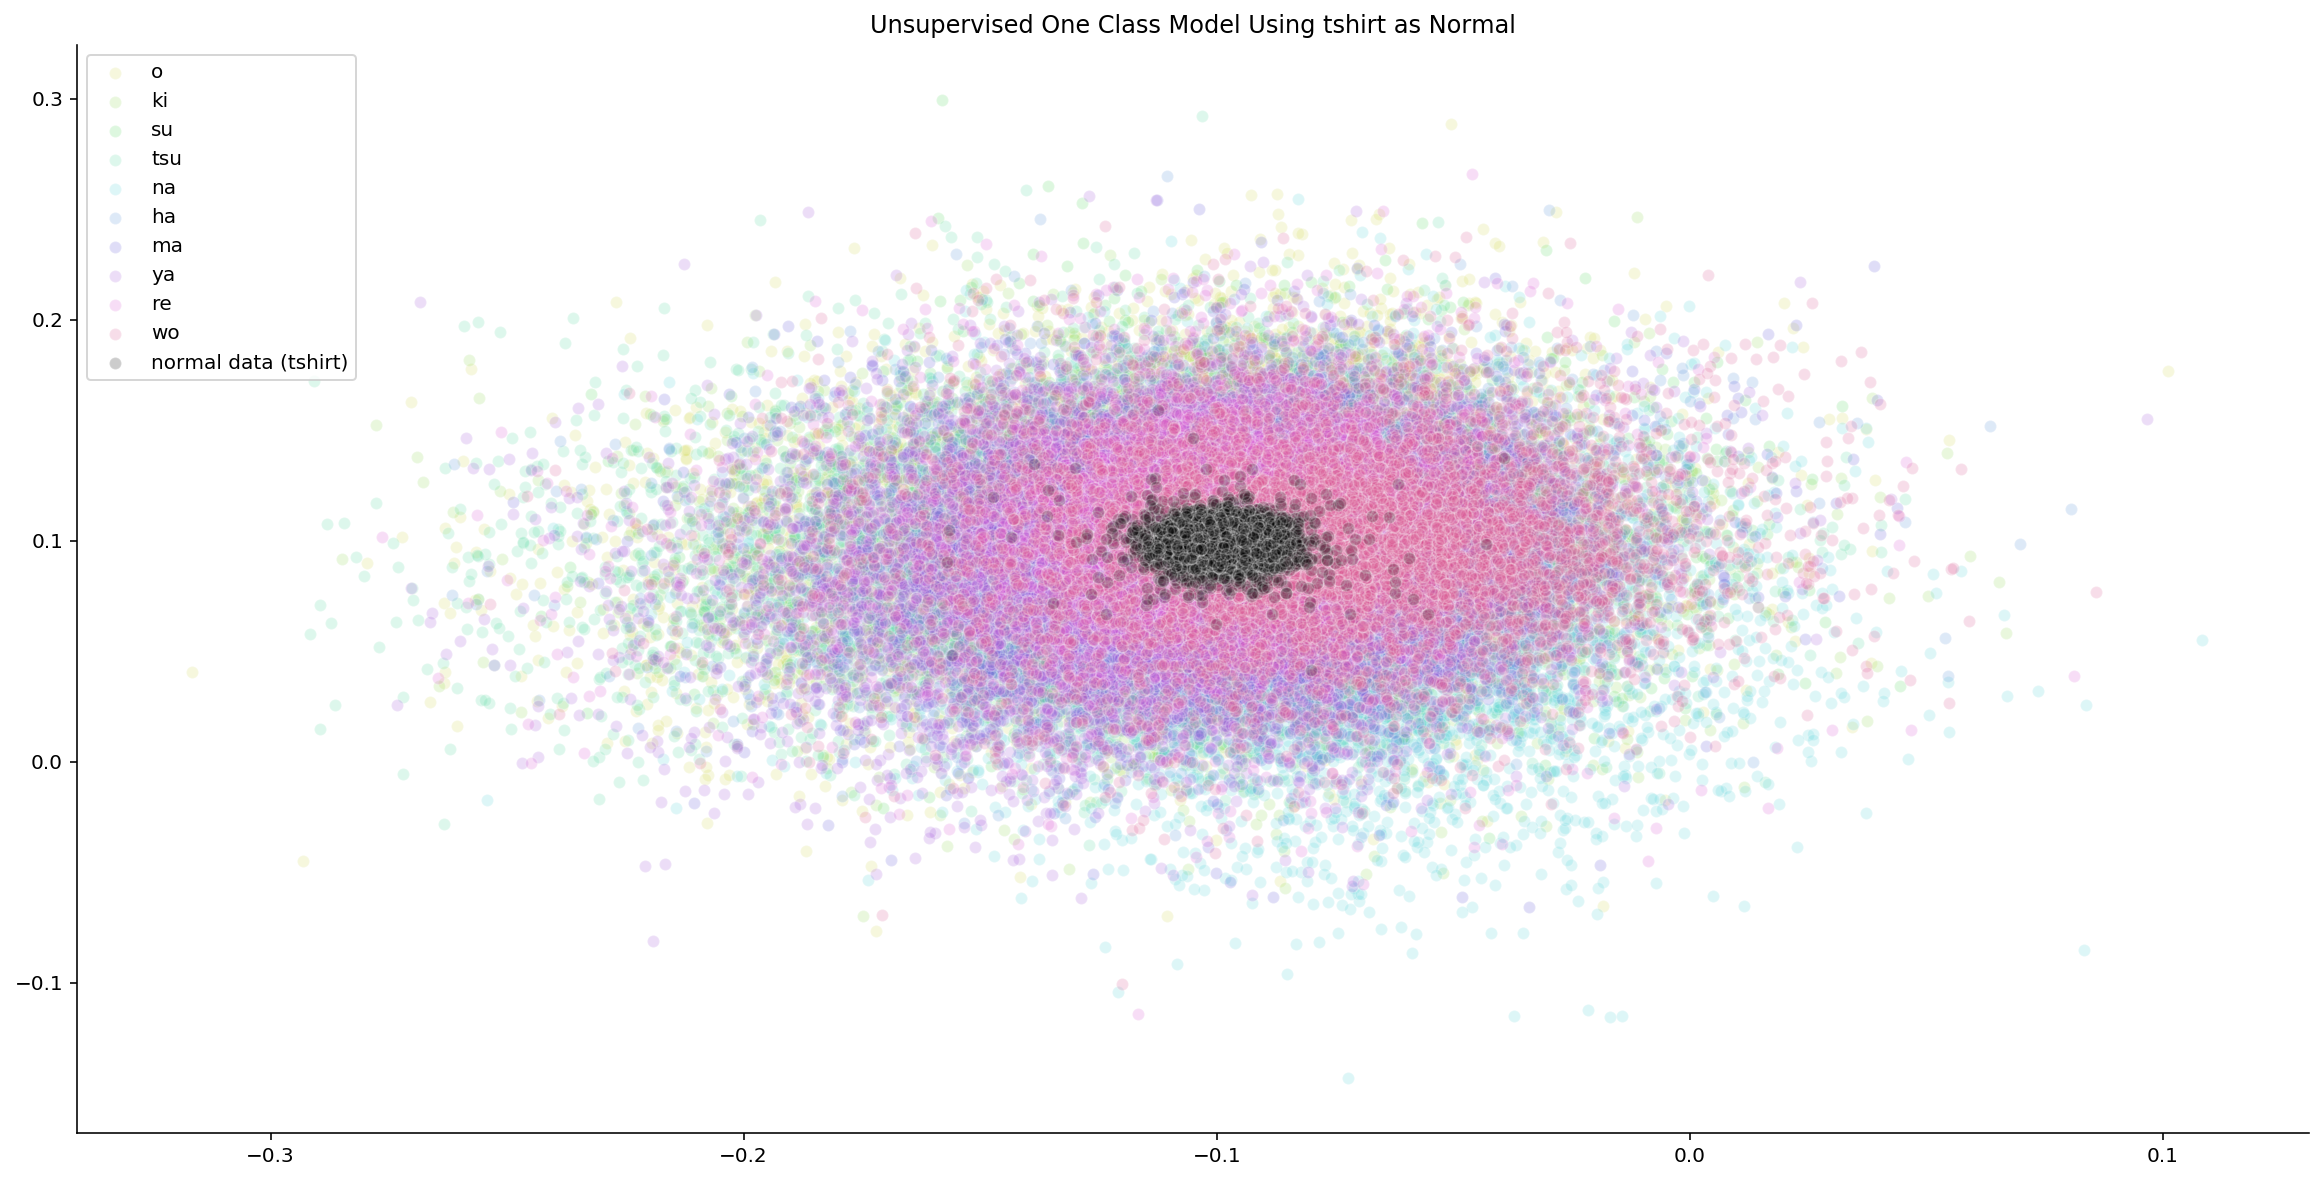

In [12]:
loader_eval_name = 'kmnist_eval'
root_eval = '/net/leksai/data/KMNIST'
label_eval_list = [(i,) for i in range(10)]
dataset_eval_list = []
for label_eval in label_eval_list:
    dataset_eval_list.append(load_dataset(loader_name=loader_eval_name,
                                          root=root_eval,
                                          label_eval=label_eval,
                                          test_eval=False))

data_list = []
for dataset_eval in dataset_eval_list:
    data = encoder.test(dataset_eval, device, batch_size, n_jobs_dataloader)
    data = np.array([x.cpu().numpy() for x in data])
    data_list.append(data.T)

normal_dataset = load_dataset(loader_name='fmnist_eval',
                                          root=root,
                                          label_eval=(0,),
                                          test_eval=False)
normal_data = encoder.test(normal_dataset, device, batch_size, n_jobs_dataloader)
normal_data = np.array([x.cpu().numpy() for x in normal_data]).T

num_to_letter = {0:'o', 1:'ki', 2:'su', 3:'tsu', 4:'na', 5:'ha', 6:'ma', 7:'ya', 8:'re', 9:'wo'}

letter_to_num = {v:k for k, v in num_to_letter.items()}

fig, ax = plt.subplots(figsize=(20, 10))

for letter in letter_to_num:
    label = letter_to_num[letter]
    data = data_list[label]
    cluster = sns.scatterplot(x=data[0], y=data[1], label=letter, alpha=0.2, color=sns.color_palette("hls", 12)[2:][label])

cluster = sns.scatterplot(x=normal_data[0], y=normal_data[1], label='normal data (tshirt)', alpha=0.2, color='black')

    
plt.legend()
plt.title('Unsupervised One Class Model Using tshirt as Normal')
# plt.ylim(-0.04, 0.08)
# plt.xlim(-0.04, 0.10)
sns.despine()


In [6]:
data_list = []
for dataset_eval in dataset_eval_list:
    data = encoder.test(dataset_eval, device, batch_size, n_jobs_dataloader)
    data = np.array([x.cpu().numpy() for x in data])
    data_list.append(data.T)

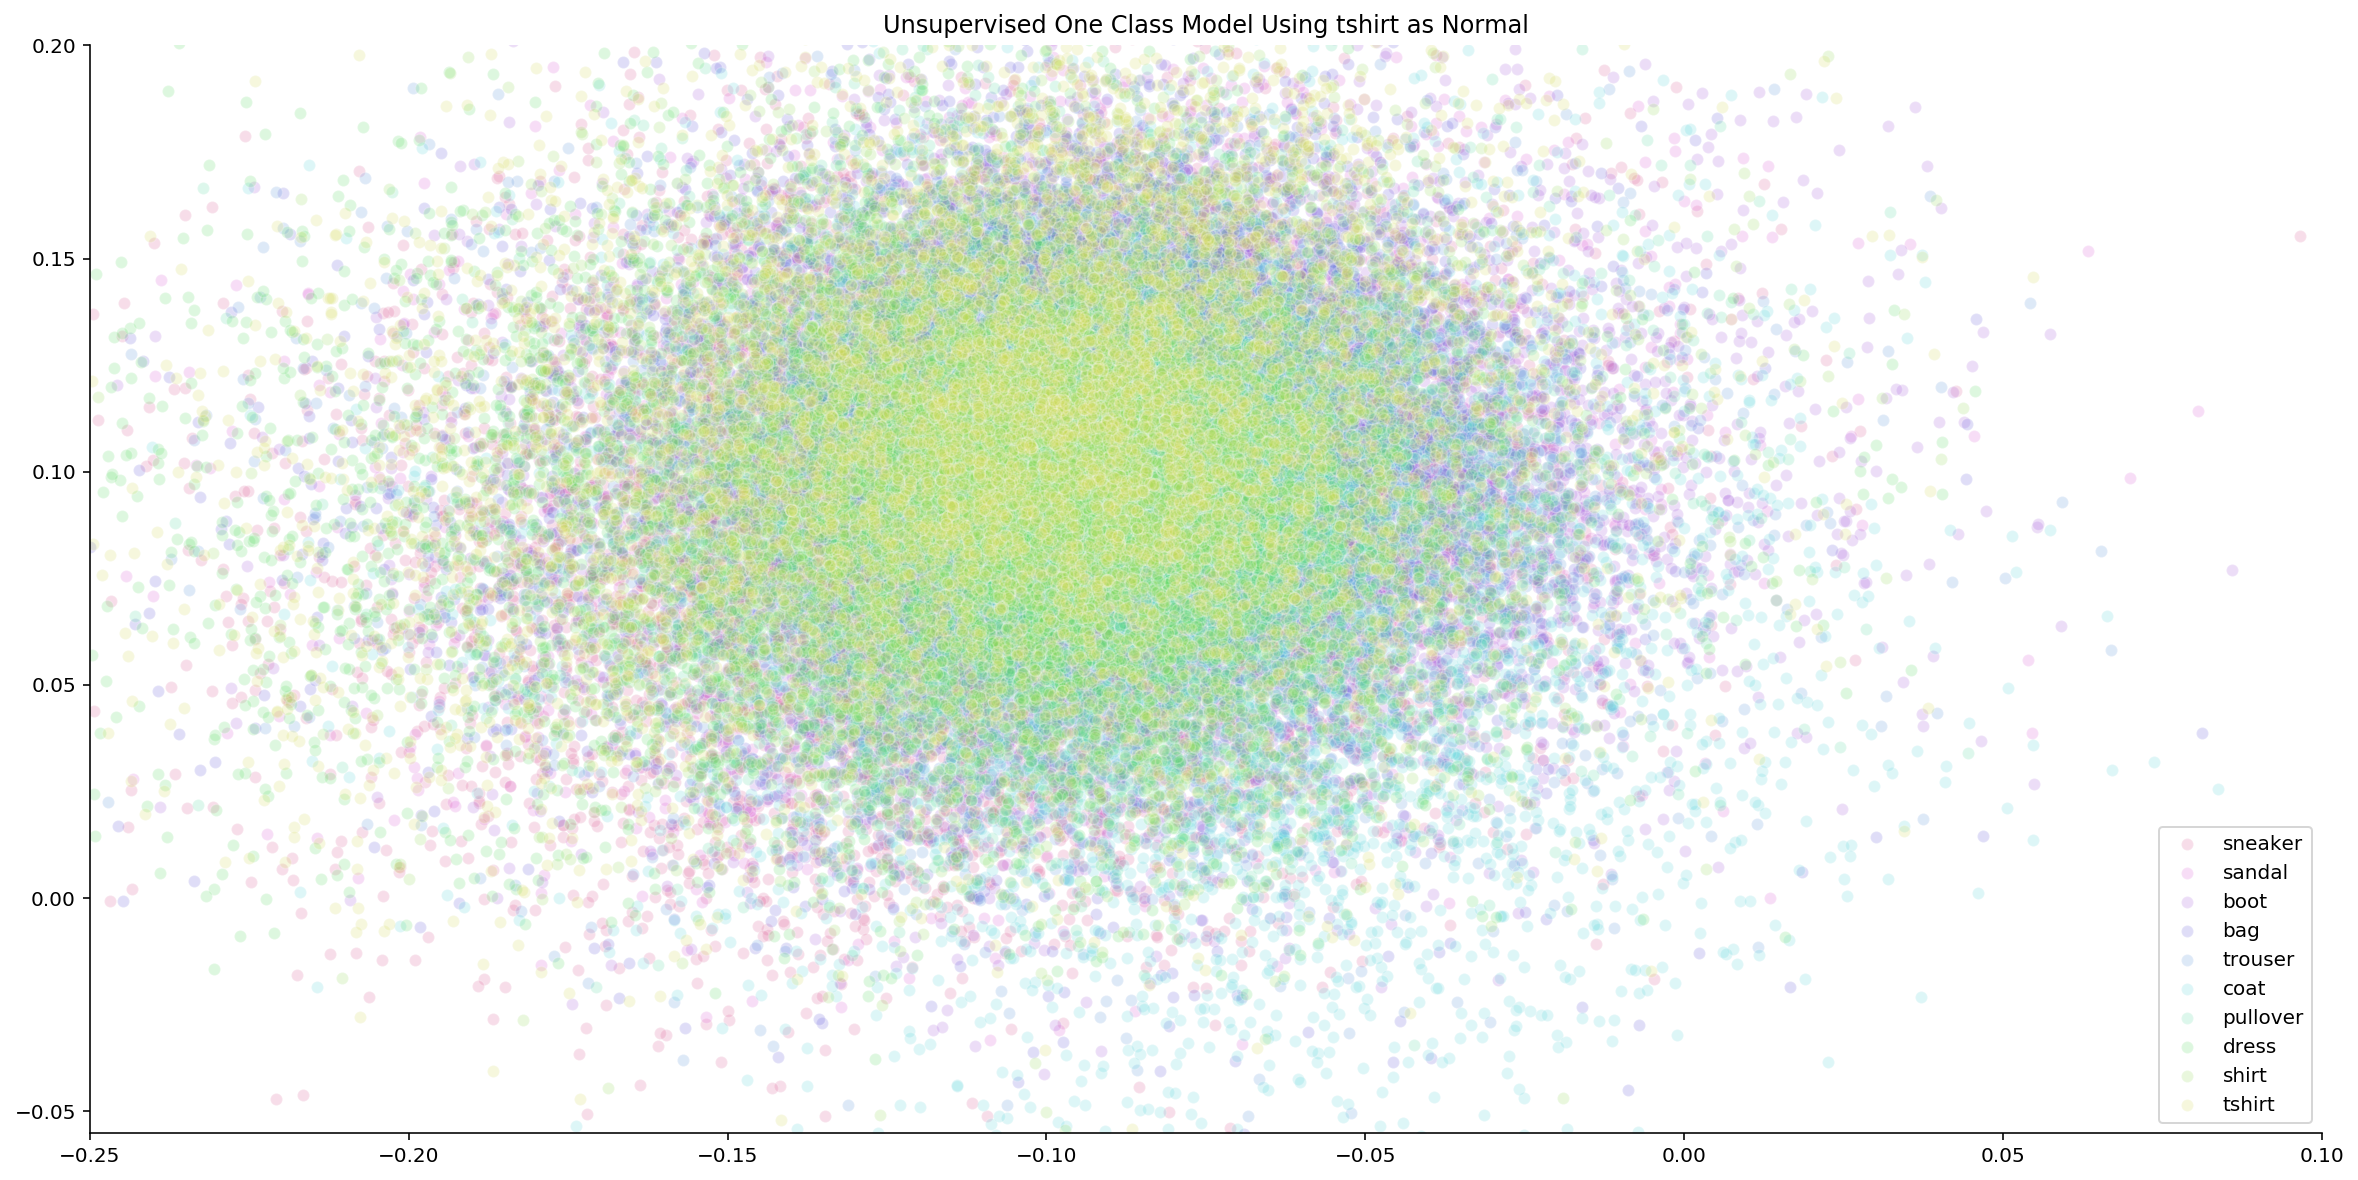

In [7]:
color_dict = {'tshirt':0,
              'shirt': 1,
              'dress':2,
              'pullover':3,
              'coat':4,
              'trouser':5,
               'bag': 6,
              'boot': 7,
              'sandal': 8,
              'sneaker':9}

num_to_letter ={0: 'tshirt', 
                1: 'trouser', 
                2: 'pullover', 
                3: 'dress', 
                4: 'coat',
                5: 'sandal', 
                6: 'shirt', 
                7: 'sneaker', 
                8: 'bag', 
                9: 'boot'}

letter_to_num = {v:k for k, v in num_to_letter.items()}

fig, ax = plt.subplots(figsize=(20, 10))

for letter in list(color_dict)[::-1]:
    label = letter_to_num[letter]
    data = data_list[label]
    cluster = sns.scatterplot(x=data[0], y=data[1], label=letter, alpha=0.2, color=sns.color_palette("hls", 12)[2:][color_dict[letter]])

plt.legend()
plt.title('Unsupervised One Class Model Using tshirt as Normal')
plt.ylim(-0.055, 0.20)
plt.xlim(-0.25, 0.10)
sns.despine()


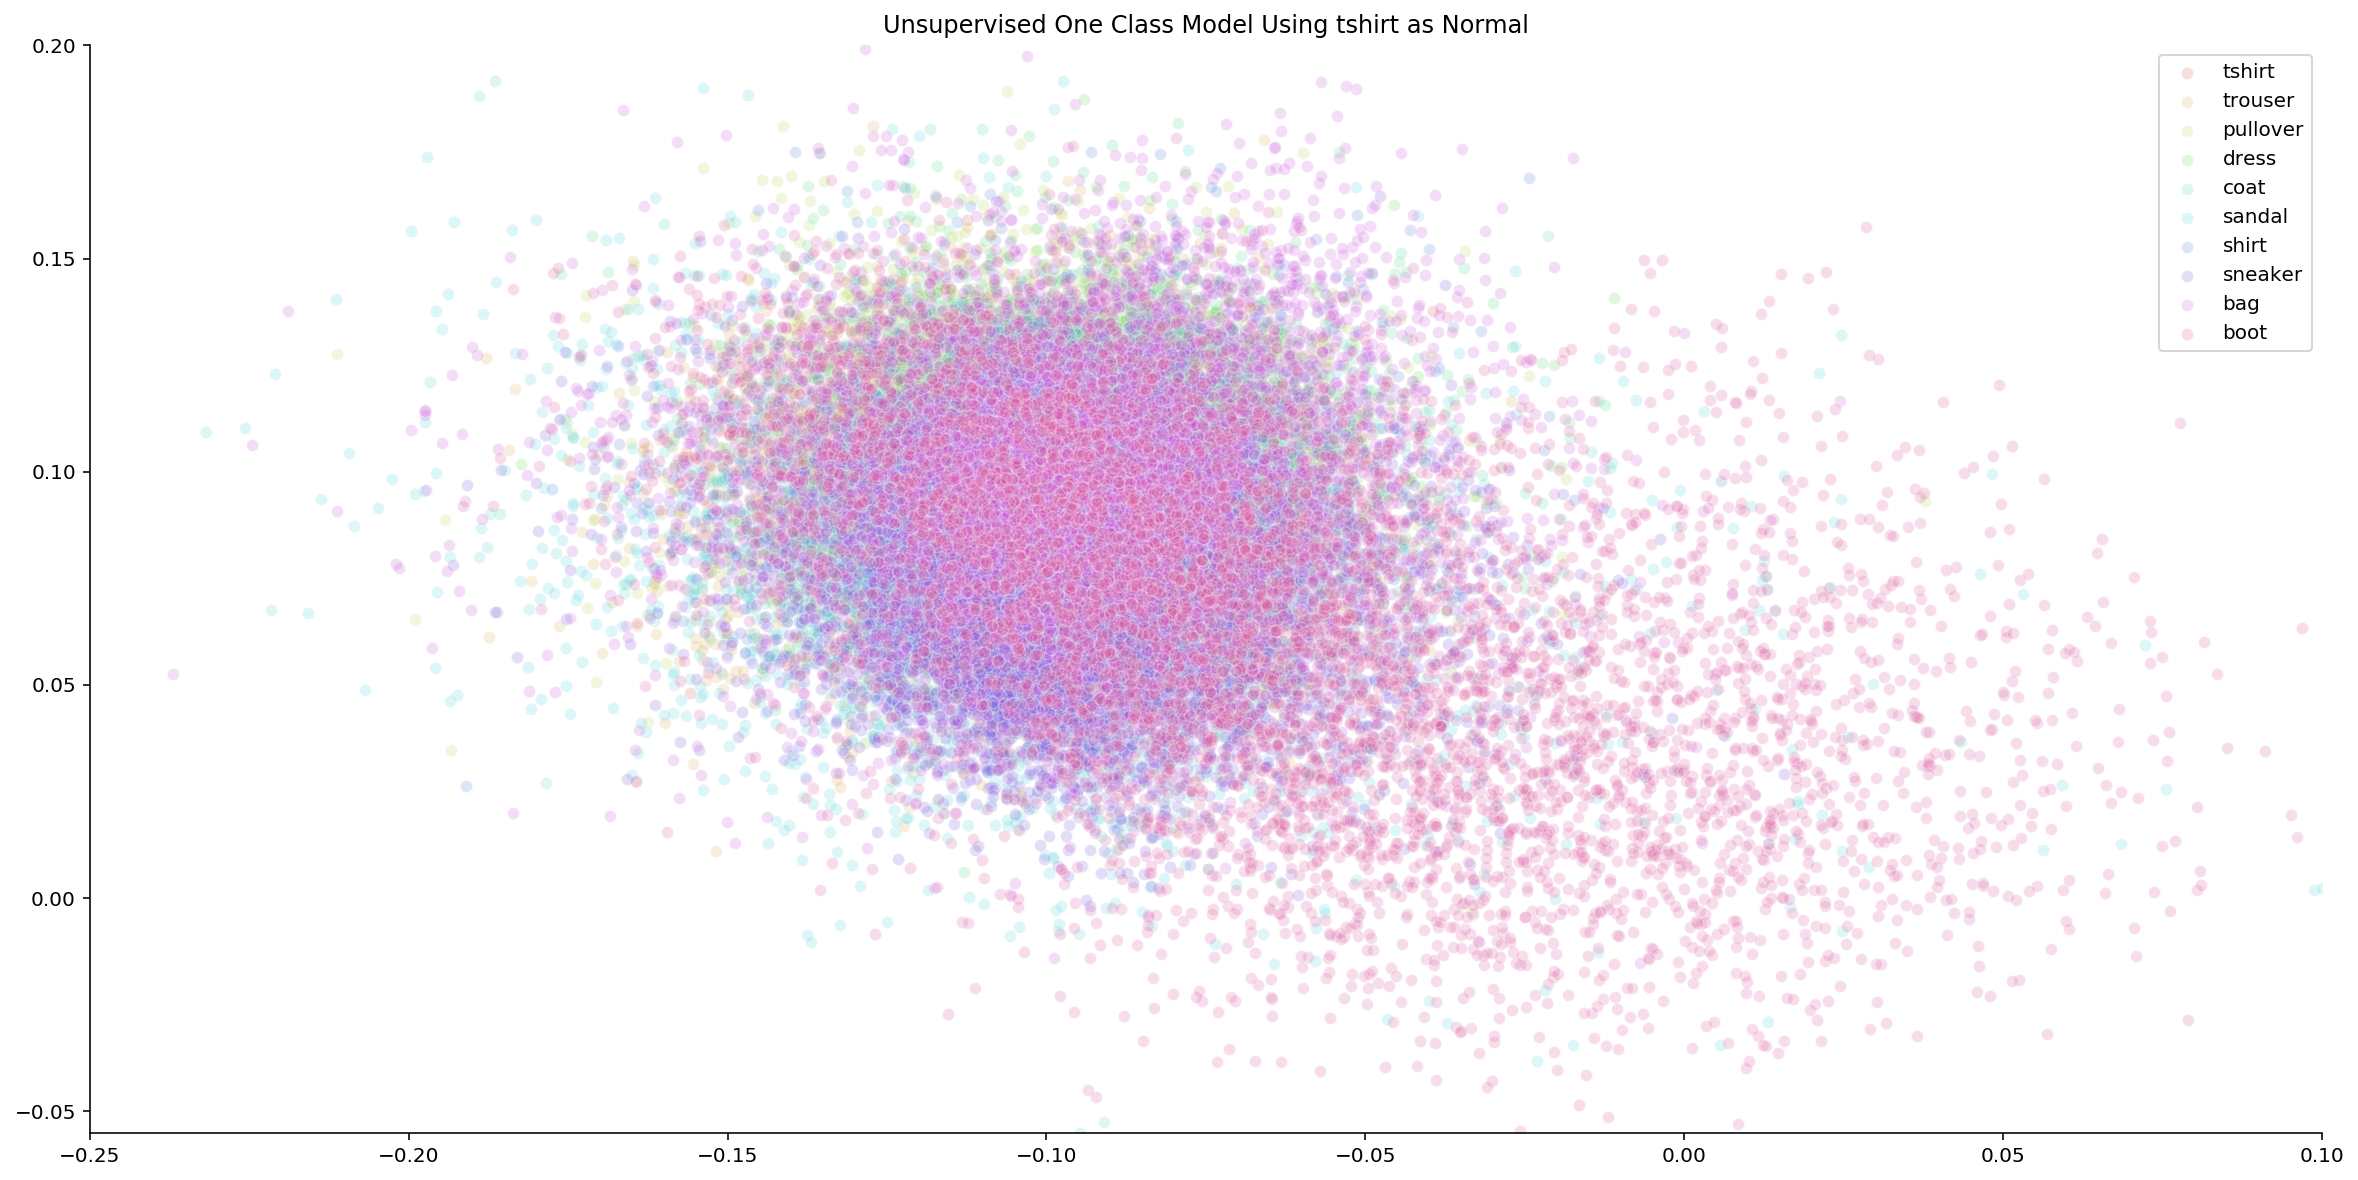

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))

for i, data in enumerate(data_list):
    cluster = sns.scatterplot(x=data[0], y=data[1], label=label_dict[i], alpha=0.2, color=sns.color_palette("hls", 10)[i])

plt.legend()
plt.title('Unsupervised One Class Model Using tshirt as Normal')
plt.ylim(-0.055, 0.20)
plt.xlim(-0.25, 0.10)
sns.despine()